# **Exploratory Data Analysis**


**Author:** Oleksandr Averkin

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

In [2]:
DIALOGS_MERGED_DATA_ALL_PATH = "C:/Users/007/Proga/HW4/data/merged_data/dialogs_data_all.csv"
DIALOGS_MERGED_DATA_USERS_ALL_PATH = "C:/Users/007/Proga/HW4/data/merged_data/dialogs_users_all.csv"

In [3]:
df_all = pd.read_csv(DIALOGS_MERGED_DATA_ALL_PATH, index_col='id')
df_users = pd.read_csv(DIALOGS_MERGED_DATA_USERS_ALL_PATH, index_col='dialog_id')

**Rename some columns:**

In [4]:
df_all.rename(columns={"id":"message_id"}, inplace=True)
df_all.rename(columns={"type":"message_type"}, inplace=True)

df_users.rename(columns={"name":"dialog_name"}, inplace=True)
df_users.rename(columns={"type":"dialog_type"}, inplace=True)

**Combining two datasets into one:**

In [5]:
df_combine = pd.merge(left=df_users, right=df_all, on="dialog_id")

## **20 questions to explore:**
1. Total amount of messages of each type.
2. Comparing the amount of private chats and groups.
3. My activity in private chats compared to groups. 
4. Total amount of photo-, sticker- and video-messages.
5. Total duration of video- and voice-messages
6. Number of messages I received from my best friends.
7. The number of messages of each type that I sent. 
8. The number of messages of each type I received.  
9. The number of messages I sent in each season of 2021.
10. The number of messages I received in each season of 2021. 
11. My most common words in correspondence.
12. The most frequent words in the correspondence of other people with me.
13. The number of forwarded messages of different types.
14. Amount of hidden and unhidden phone numbers of people with whom I have a private dialog.
15. My activity in different parts of the day(sending messages).
16. The number of messages received in different parts of the day.
17. My activness in Telegram before the COVID-19 and after (sent messages per month).
18. My activness in Telegram before the COVID-19 and after (received messages per month).
19. Groups and chats from which I most often forwarded messages.
20. The groups I sent the most messages to.

**1. Total amount of messages of each type.**

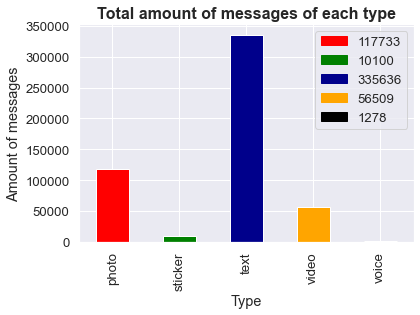

In [257]:
#data for legeng
df_photoMessages=df_all[(df_all["message_type"]=="photo")]
photo_sum = df_photoMessages["message_type"].count()

df_stickerMessages=df_all[(df_all["message_type"]=="sticker")]
sticker_sum = df_stickerMessages["message_type"].count()

df_textMessages=df_all[(df_all["message_type"]=="text")]
text_sum = df_textMessages["message_type"].count()

df_videoMessages=df_all[(df_all["message_type"]=="video")]
video_sum = df_videoMessages["message_type"].count()

df_voiceMessages=df_all[(df_all["message_type"]=="voice")]
voice_sum = df_voiceMessages["message_type"].count()

colors = {photo_sum:'red', sticker_sum:'green', text_sum:'darkblue', video_sum:'orange', voice_sum:'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

#diagram
gr = df_all.groupby(["message_type"])["message_type"].count().plot.bar(color = ['red', 'green','darkblue','orange','black'])
plt.xlabel('Type')
plt.ylabel('Amount of messages')
plt.title('Total amount of messages of each type', fontsize=16, fontweight='bold')
plt.legend(handles, labels)

**2. Comparing the amount of private chats and groups.**

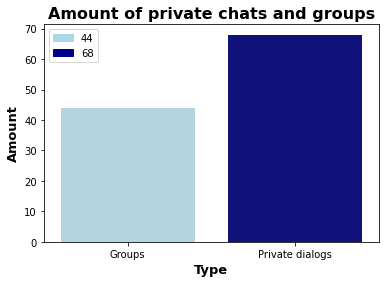

In [72]:
df_groups = df_users[df_users["dialog_type"] == "Group"]
df_groups = df_groups["dialog_name"].unique()
groups_num = len(df_groups)

df_dialogs = df_users[df_users["dialog_type"] == "Private dialog"]
df_dialogs = df_dialogs["dialog_name"].unique()
dialogs_num = len(df_dialogs)

#diagram
colors = {groups_num:'lightblue', dialogs_num:'darkblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

x = ["Groups", "Private dialogs"]
y = [groups_num, dialogs_num]

sns.barplot(x, y, palette = ['lightblue','darkblue'])
plt.title('Amount of private chats and groups', fontsize=16, fontweight='bold')
plt.xlabel('Type', fontsize=13, fontweight='bold')
plt.ylabel('Amount', fontsize=13, fontweight='bold') 
plt.legend(handles, labels)
plt.show()

**3. My activity in private chats compared to groups.**

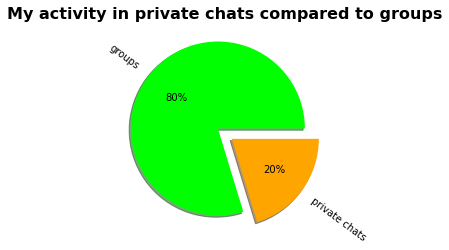

In [73]:
df_my_msgs = df_combine[df_combine["from_id"] == "PeerUser(user_id=687038668)"].dropna(axis = 0,subset=['message'])
all_msgs = df_my_msgs["message_type"].count()

df_group_act = df_my_msgs[df_my_msgs["dialog_type"] == "Group"]
group_msgs = df_group_act["message_type"].count()

chat_msgs = all_msgs - group_msgs

size = [group_msgs, chat_msgs]
explode = [0.1, 0.1,]
names = ['groups','private chats']
colors = ["lime", "orange"]

# create pie chart using matplotlib
plt.pie(size, labels=names, colors=colors, autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true')
plt.title('My activity in private chats compared to groups', fontsize=16, fontweight='bold')
plt.show()

**4. Total amount of photo-, sticker- and video-messages.**

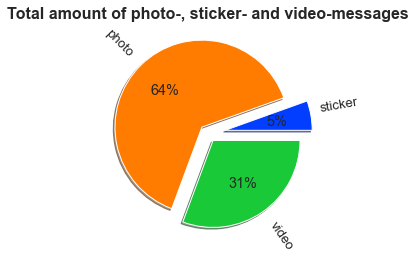

In [164]:
pd.options.display.float_format = '{:,.1f}'.format

df_photoMessages=df_all[df_all["message_type"]=="photo"]
photo_sum = df_photoMessages["message_type"].count()

df_videoMessages=df_all[df_all["message_type"]=="video"]             
video_sum = df_videoMessages["message_type"].count()
             
df_stickerMessages=df_all[df_all["message_type"]=="sticker"]
sticker_sum = df_stickerMessages["message_type"].count()

size = [sticker_sum, photo_sum, video_sum]
explode = [0.2, 0.1, 0.1]
names = ['sticker','photo','video']
colors = sns.color_palette('bright')

# create pie chart using matplotlib
plt.pie(size, labels=names, colors=colors, autopct='%.0f%%', explode=explode, shadow=True, rotatelabels='true')
plt.title('Total amount of photo-, sticker- and video-messages', fontsize=16, fontweight='bold')
plt.show()

**5. Total duration of video- and voice-messages.**

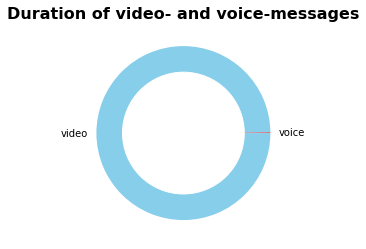

In [122]:
pd.options.display.float_format = '{:,.1f}'.format

df_voiceMessages=df_all[df_all["message_type"]=="voice"]
voice_sum = (df_voiceMessages["duration"].sum())/60

df_videoMessages=df_all[df_all["message_type"]=="video"]
video_sum = (df_videoMessages["duration"].sum())/60

# create data
names = ['voice', 'video']
size = [voice_sum,video_sum]
 
# Create a circle at the center of the plot
my_circle = plt.Circle( (0,0), 0.7, color='white')

# Give color names
plt.pie(size, labels=names, colors=['red','skyblue'])
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.title('Duration of video- and voice-messages', fontsize=16, fontweight='bold')
plt.show()

**6. Number of messages I received from my best friends.**

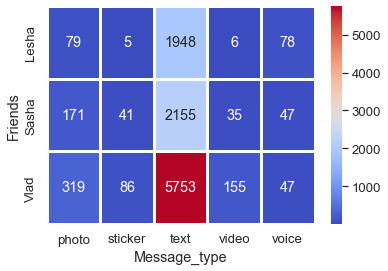

In [54]:
df_chatWithVlad=df_all[df_all["from_id"] == "PeerUser(user_id=385445725)"]
df_chatWithVlad = df_chatWithVlad[["from_id","message_type"]]

df_chatWithSasha=df_all[df_all["from_id"] == "PeerUser(user_id=639525198)"]
df_chatWithSasha = df_chatWithSasha[["from_id","message_type"]]

df_chatWithLesha=df_all[df_all["from_id"] == "PeerUser(user_id=437640785)"]
df_chatWithLesha = df_chatWithLesha[["from_id","message_type"]]

df_chatWithFriends = pd.concat([df_chatWithVlad, df_chatWithSasha, df_chatWithLesha], axis=0)
#to see data
#df_chatWithFriends.groupby(["from_id", "message_type"])["message_type"].count()  
#Using the data seen in the previous step
chats_stat = {"Friends":["Vlad","Vlad","Vlad","Vlad","Vlad", "Lesha","Lesha","Lesha","Lesha","Lesha", "Sasha","Sasha","Sasha","Sasha","Sasha"],
             "Message_type":["photo","sticker","text","video","voice","photo","sticker","text","video","voice","photo","sticker","text","video","voice"],
             "Amount":["319","86","5753","155","47","79","5","1948","6","78","171","41","2155","35","47"]}
df_chats = pd.DataFrame(chats_stat)

result_table = df_chats.pivot_table(index='Friends', columns='Message_type', values='Amount')
sns.set(font_scale = 1.2)
ax = sns.heatmap(result_table, linewidths=3, annot=True, fmt="g",cmap="coolwarm")

**7. The number of messages of each type that I sent.**

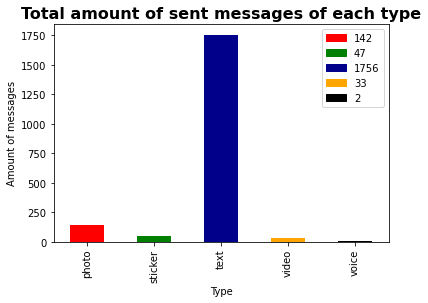

In [108]:
df_sent = df_all[df_all["from_id"] == "PeerUser(user_id=687038668)"]
#data for legeng
df_photoMessages=df_sent[(df_sent["message_type"]=="photo")]
photo_sum = df_photoMessages["message_type"].count()

df_stickerMessages=df_sent[(df_sent["message_type"]=="sticker")]
sticker_sum = df_stickerMessages["message_type"].count()

df_textMessages=df_sent[(df_sent["message_type"]=="text")]
text_sum = df_textMessages["message_type"].count()

df_videoMessages=df_sent[(df_sent["message_type"]=="video")]
video_sum = df_videoMessages["message_type"].count()

df_voiceMessages=df_sent[(df_sent["message_type"]=="voice")]
voice_sum = df_voiceMessages["message_type"].count()

colors = {photo_sum:'red', sticker_sum:'green', text_sum:'darkblue', video_sum:'orange', voice_sum:'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
#diagram
gr = df_sent.groupby(["message_type"])["message_type"].count().plot.bar(color = ['red', 'green','darkblue','orange','black'])

plt.xlabel('Type')
plt.ylabel('Amount of messages')
plt.title('Total amount of sent messages of each type', fontsize=16, fontweight='bold')
plt.legend(handles, labels)


**8. The number of messages of each type I received.**

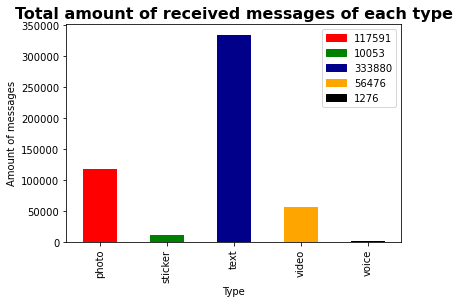

In [16]:
df_received = df_all[df_all["from_id"] != "PeerUser(user_id=687038668)"]

#data for legeng
df_all_photos = df_all[df_all["message_type"] == "photo"]
received_photos = df_all_photos["message_type"].count() - photo_sum

df_all_stickers = df_all[df_all["message_type"] == "sticker"]
received_stickers = df_all_stickers["message_type"].count() - sticker_sum

df_all_texts = df_all[df_all["message_type"] == "text"]
received_texts = df_all_texts["message_type"].count() - text_sum

df_all_videos = df_all[df_all["message_type"] == "video"]
received_videos = df_all_videos["message_type"].count() - video_sum

df_all_voices = df_all[df_all["message_type"] == "voice"]
received_voices = df_all_voices["message_type"].count() - voice_sum

colors = {received_photos:'red', received_stickers:'green', received_texts:'darkblue', received_videos:'orange', received_voices:'black'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

#diagram
gr = df_received.groupby(["message_type"])["message_type"].count().plot.bar(color = ['red', 'green','darkblue','orange','black'])

plt.xlabel('Type')
plt.ylabel('Amount of messages')
plt.title('Total amount of received messages of each type', fontsize=16, fontweight='bold')
plt.legend(handles, labels)


**9. The number of messages I sent in each season of 2021.**

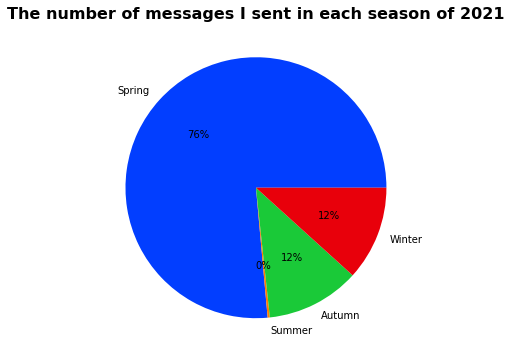

In [111]:
#count message for spring
df_march = df_all[(df_all["date"].str.contains("2021-03")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
spring_sum = df_march["message_type"].count()

df_april = df_all[(df_all["date"].str.contains("2021-04")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
spring_sum += df_april["message_type"].count()

df_may = df_all[(df_all["date"].str.contains("2021-05")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
spring_sum += df_may["message_type"].count()

#count message for summer
df_jun = df_all[(df_all["date"].str.contains("2021-06")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
summer_sum = df_jun["message_type"].count()

df_jul = df_all[(df_all["date"].str.contains("2021-07")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
summer_sum += df_jul["message_type"].count()

df_aug = df_all[(df_all["date"].str.contains("2021-08")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
summer_sum += df_aug["message_type"].count()

#count message for autumn
df_sept = df_all[(df_all["date"].str.contains("2021-09")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
autumn_sum = df_sept["message_type"].count()

df_oct = df_all[(df_all["date"].str.contains("2021-10")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
autumn_sum += df_oct["message_type"].count()

df_nov = df_all[(df_all["date"].str.contains("2021-11")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
autumn_sum += df_nov["message_type"].count()

#count message for winter
df_dec = df_all[(df_all["date"].str.contains("2021-12")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
winter_sum = df_dec["message_type"].count()

df_jan = df_all[(df_all["date"].str.contains("2021-01")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
winter_sum += df_jan["message_type"].count()

df_febr = df_all[(df_all["date"].str.contains("2021-02")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
winter_sum += df_febr["message_type"].count()

#build the diagram
data = [spring_sum, summer_sum, autumn_sum, winter_sum]
labels = ['Spring', 'Summer', 'Autumn', 'Winter']

colors = sns.color_palette('bright')[0:4]
plt.figure(figsize=(6,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('The number of messages I sent in each season of 2021', fontsize=16, fontweight='bold')
plt.show()

**10. The number of messages I received in each season of 2021.**

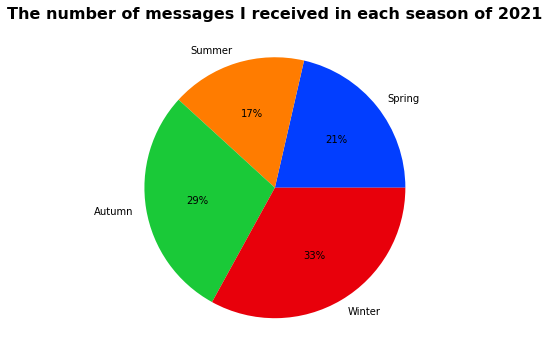

In [112]:
#count message for spring
df_march = df_all[df_all["date"].str.contains("2021-03")]
spring = df_march["message_type"].count()

df_april = df_all[df_all["date"].str.contains("2021-04")]
spring += df_april["message_type"].count()

df_may = df_all[df_all["date"].str.contains("2021-05")]
spring += df_may["message_type"].count()

spring -= spring_sum

#count message for summer
df_jun = df_all[df_all["date"].str.contains("2021-06")]
summer = df_jun["message_type"].count()

df_jul = df_all[df_all["date"].str.contains("2021-07")]
summer += df_jul["message_type"].count()

df_aug = df_all[df_all["date"].str.contains("2021-08")]
summer += df_aug["message_type"].count()

summer -= summer_sum

#count message for autumn
df_sept = df_all[df_all["date"].str.contains("2021-09")]
autumn = df_sept["message_type"].count()

df_oct = df_all[df_all["date"].str.contains("2021-10")]
autumn += df_oct["message_type"].count()

df_nov = df_all[df_all["date"].str.contains("2021-11")]
autumn += df_nov["message_type"].count()

autumn -= autumn_sum

#count message for winter
df_dec = df_all[df_all["date"].str.contains("2021-12")]
winter = df_dec["message_type"].count()

df_jan = df_all[df_all["date"].str.contains("2021-01")]
winter += df_jan["message_type"].count()

df_febr = df_all[df_all["date"].str.contains("2021-02")]
winter += df_febr["message_type"].count()

winter -= winter_sum

#build the diagram
data = [spring, summer, autumn, winter]
labels = ['Spring', 'Summer', 'Autumn', 'Winter']

colors = sns.color_palette('bright')[0:4]
plt.figure(figsize=(6,6))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('The number of messages I received in each season of 2021', fontsize=16, fontweight='bold')
plt.show()

**11. My most common words in correspondence.**

In [166]:
bad_words = ["я","в","не","на","и","что","по","так","всё","мы","за","над","но","тем","кто","ещё","если","из","а","у","с",
             "это","как","nan","to","она","он","уже","да","нет","там","то","-","+","a","да,","і","це","з","що","ну","тут","та",
             "до","ти","для","см","але","як","про","все","—","@zvyykbot","👉","▪️","мене","вже","ще","є","ты","нас","буде","якщо",
             "через","мм","чи","/","ж","будет","⤵️","2","мені","ми","шо","1","или","мне","він","тебе","можно","можна",
             "к","от","его","вот"]

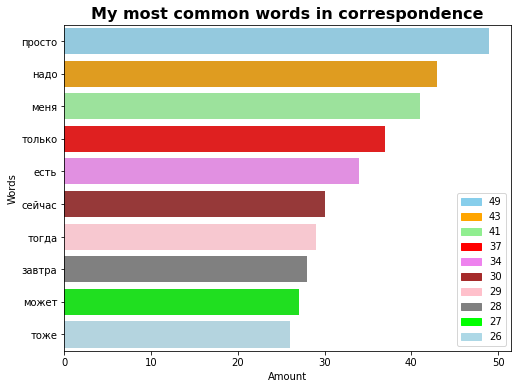

In [167]:
my_messages = df_all[(df_all["message_type"]=="text") & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
my_messages = my_messages[['message','dialog_id']]

str_messages = my_messages.applymap(str)
my_words = Counter(" ".join(str_messages["message"]).lower().split())

for i in range(len(bad_words)):
    bad_word = bad_words[i]
    if bad_word in my_words:
        del my_words[bad_word]
my_data=my_words.most_common(10)
df_my_words = pd.DataFrame(data=my_data, columns=['word', 'amount'])

#build the diagram
colors = {my_data[0][1]:'skyblue', my_data[1][1]:'orange', my_data[2][1]:'lightgreen', my_data[3][1]:'red', my_data[4][1]:'violet', 
          my_data[5][1]:'brown', my_data[6][1]:'pink', my_data[7][1]:'grey', my_data[8][1]:'lime', my_data[9][1]:'lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.figure(figsize=(8,6))
sns.barplot(x = 'amount', y = 'word', data = df_my_words, palette = ['skyblue','orange','lightgreen','red','violet','brown','pink','grey','lime','lightblue'])
plt.xlabel('Amount')
plt.ylabel('Words')
plt.title('My most common words in correspondence', fontsize=16, fontweight='bold')
plt.legend(handles, labels)
plt.show()

**12. The most frequent words in the correspondence of other people with me.**

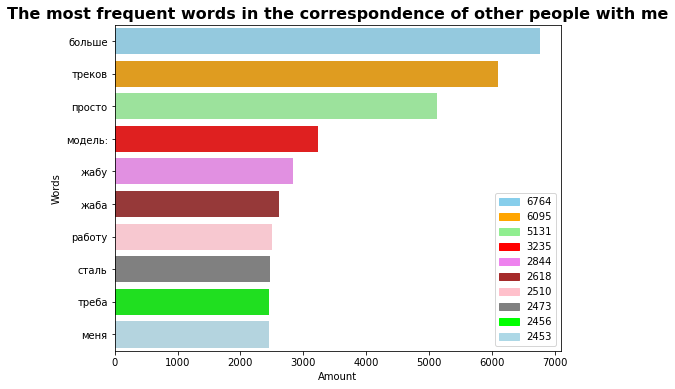

In [157]:
foreign_messages = df_all[(df_all["message_type"]=="text") & (df_all["from_id"] != "PeerUser(user_id=687038668)")]
foreign_messages = foreign_messages[['message','dialog_id']]

str_messages = foreign_messages.applymap(str)
foreign_words = Counter(" ".join(str_messages["message"]).lower().split())
for i in range(len(bad_words)):
    bad_word = bad_words[i]
    if bad_word in foreign_words:
        del foreign_words[bad_word]
my_data=foreign_words.most_common(10)
df_foreign_words = pd.DataFrame(data=my_data, columns=['word', 'amount'])

#build the diagram
colors = {my_data[0][1]:'skyblue', my_data[1][1]:'orange', my_data[2][1]:'lightgreen', my_data[3][1]:'red', my_data[4][1]:'violet', 
          my_data[5][1]:'brown', my_data[6][1]:'pink', my_data[7][1]:'grey', my_data[8][1]:'lime', my_data[9][1]:'lightblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

plt.figure(figsize=(8,6))
sns.barplot(x = 'amount', y = 'word', data = df_foreign_words, palette = ['skyblue','orange','lightgreen','red','violet','brown','pink','grey','lime','lightblue'])
plt.xlabel('Amount')
plt.ylabel('Words')
plt.title('The most frequent words in the correspondence of other people with me', fontsize=16, fontweight='bold')
plt.legend(handles, labels)
plt.show()

**13. The number of forwarded messages of different types.**

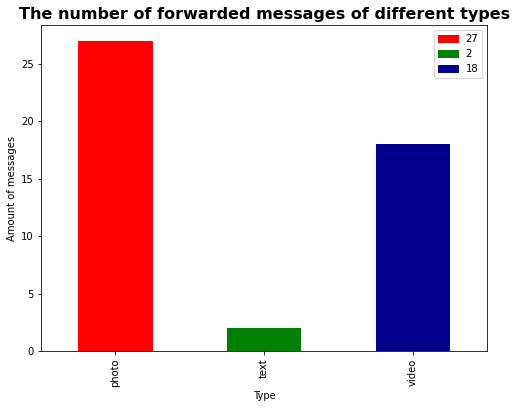

In [141]:
df_forwarded = df_all.loc[(df_all["from_id"] == "PeerUser(user_id=687038668)")].dropna(axis = 0,subset=['fwd_from'])

#for legend
df_photoMessages=df_forwarded[(df_forwarded["message_type"]=="photo")]
photo_sum = df_photoMessages["message_type"].count()

df_textMessages=df_forwarded[(df_forwarded["message_type"]=="text")]
text_sum = df_textMessages["message_type"].count()

df_videoMessages=df_forwarded[(df_forwarded["message_type"]=="video")]
video_sum = df_videoMessages["message_type"].count()

colors = {photo_sum:'red', text_sum:'green', video_sum:'darkblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

#diagram
plt.figure(figsize=(8,6))
gr = df_forwarded.groupby(["message_type"])["message_type"].count().plot.bar(color = ['red', 'green','darkblue'])
plt.xlabel('Type')
plt.ylabel('Amount of messages')
plt.title('The number of forwarded messages of different types', fontsize=16, fontweight='bold')
plt.legend(handles, labels)

**14. Amount of hidden and unhidden phone numbers of people with whom I have a private dialog.**

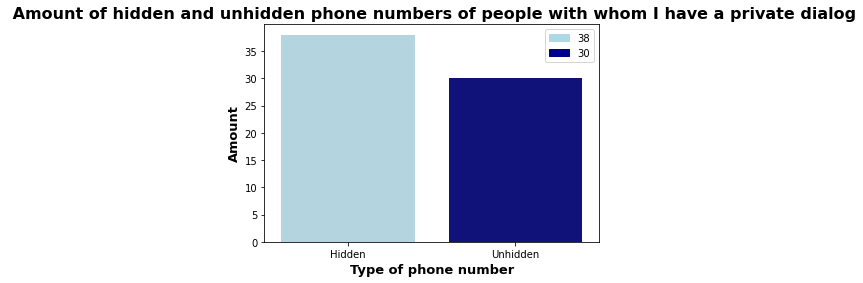

In [70]:
df_all_people = df_users[df_users["dialog_type"] == "Private dialog"]
all_nums = len(df_all_people)

df_hidden = df_users[df_users["users"].str.contains("'phone': None")]
df_hidden = df_hidden[df_hidden["dialog_type"] == "Private dialog"]
hidden_nums = len(df_hidden)

unhidden_nums = all_nums - hidden_nums

#diagram
colors = {hidden_nums:'lightblue', unhidden_nums:'darkblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

x = ["Hidden", "Unhidden"]
y = [hidden_nums, unhidden_nums]

sns.barplot(x, y, palette = ['lightblue','darkblue'])
plt.title(' Amount of hidden and unhidden phone numbers of people with whom I have a private dialog', fontsize=16, fontweight='bold')
plt.xlabel('Type of phone number', fontsize=13, fontweight='bold')
plt.ylabel('Amount', fontsize=13, fontweight='bold') 
plt.legend(handles, labels)
plt.show()

**15. My activity in different parts of the day(sending messages).** 

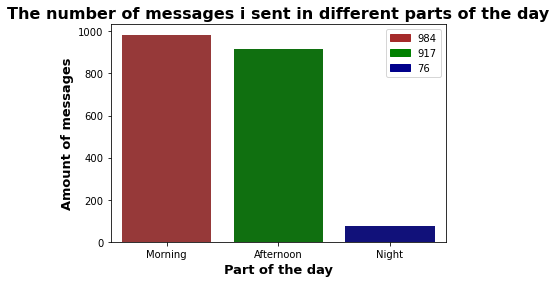

In [8]:
#all messages that i sent in the mornings (5:00 - 12:00)
df_5 = df_all[(df_all["date"].str.contains(" 05:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning = df_5["message_type"].count()

df_6 = df_all[(df_all["date"].str.contains(" 06:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_6["message_type"].count()

df_7 = df_all[(df_all["date"].str.contains(" 07:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_7["message_type"].count()

df_8 = df_all[(df_all["date"].str.contains(" 08:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_8["message_type"].count()

df_9 = df_all[(df_all["date"].str.contains(" 09:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_9["message_type"].count()

df_10 = df_all[(df_all["date"].str.contains(" 10:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_10["message_type"].count()

df_11 = df_all[(df_all["date"].str.contains(" 11:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_11["message_type"].count()

df_12 = df_all[(df_all["date"].str.contains(" 12:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
morning += df_12["message_type"].count()

#all messages that i sent in the middle part of the day(13:00-20:00)
df_13 = df_all[(df_all["date"].str.contains(" 13:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon = df_13["message_type"].count()

df_14 = df_all[(df_all["date"].str.contains(" 14:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_14["message_type"].count()

df_15 = df_all[(df_all["date"].str.contains(" 15:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_15["message_type"].count()

df_16 = df_all[(df_all["date"].str.contains(" 16:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_16["message_type"].count()

df_17 = df_all[(df_all["date"].str.contains(" 17:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_17["message_type"].count()

df_18 = df_all[(df_all["date"].str.contains(" 18:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_18["message_type"].count()

df_19 = df_all[(df_all["date"].str.contains(" 19:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_19["message_type"].count()

df_20 = df_all[(df_all["date"].str.contains(" 20:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
afternoon += df_20["message_type"].count()

#all messages that i sent in the late part of the day(21:00-04:00)
df_21 = df_all[(df_all["date"].str.contains(" 21:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night = df_21["message_type"].count()

df_22 = df_all[(df_all["date"].str.contains(" 22:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_22["message_type"].count()

df_23 = df_all[(df_all["date"].str.contains(" 23:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_23["message_type"].count()

df_24 = df_all[(df_all["date"].str.contains(" 24:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_24["message_type"].count()

df_01 = df_all[(df_all["date"].str.contains(" 01:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_01["message_type"].count()

df_02 = df_all[(df_all["date"].str.contains(" 02:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_02["message_type"].count()

df_03 = df_all[(df_all["date"].str.contains(" 03:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_03["message_type"].count()

df_04 = df_all[(df_all["date"].str.contains(" 04:")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
night += df_04["message_type"].count()

#diagram
colors = {morning:'brown', afternoon:'green', night:'darkblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

x = ["Morning", "Afternoon", "Night"]
y = [morning, afternoon, night]

sns.barplot(x, y, palette = ['brown', 'green','darkblue'])
plt.title('The number of messages i sent in different parts of the day', fontsize=16, fontweight='bold')
plt.xlabel('Part of the day', fontsize=13, fontweight='bold')
plt.ylabel('Amount of messages', fontsize=13, fontweight='bold') 
plt.legend(handles, labels)
plt.show()

**16. The number of messages received in different parts of the day.**

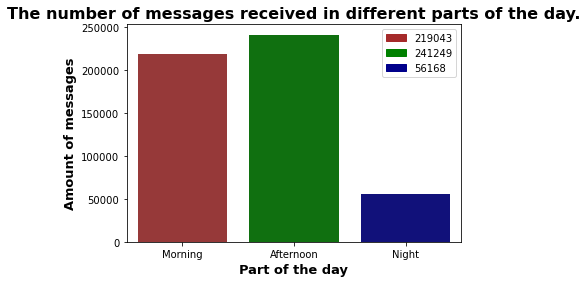

In [82]:
#all messages in the mornings (5:00 - 12:00)
df_5 = df_all[df_all["date"].str.contains(" 05:")]
morning_all = df_5["message_type"].count()

df_6 = df_all[df_all["date"].str.contains(" 06:")]
morning_all += df_6["message_type"].count()

df_7 = df_all[df_all["date"].str.contains(" 07:")]
morning_all += df_7["message_type"].count()

df_8 = df_all[df_all["date"].str.contains(" 08:")]
morning_all += df_8["message_type"].count()

df_9 = df_all[df_all["date"].str.contains(" 09:")]
morning_all += df_9["message_type"].count()

df_10 = df_all[df_all["date"].str.contains(" 10:")]
morning_all += df_10["message_type"].count()

df_11 = df_all[df_all["date"].str.contains(" 11:")]
morning_all += df_11["message_type"].count()

df_12 = df_all[df_all["date"].str.contains(" 12:")]
morning_all += df_12["message_type"].count()

morning_received = morning_all - morning

#all messages in the middle part of the day(13:00-20:00)
df_13 = df_all[df_all["date"].str.contains(" 13:")]
afternoon_all = df_13["message_type"].count()

df_14 = df_all[df_all["date"].str.contains(" 14:")]
afternoon_all += df_14["message_type"].count()

df_15 = df_all[df_all["date"].str.contains(" 15:")]
afternoon_all += df_15["message_type"].count()

df_16 = df_all[df_all["date"].str.contains(" 16:")]
afternoon_all += df_16["message_type"].count()

df_17 = df_all[df_all["date"].str.contains(" 17:")]
afternoon_all += df_17["message_type"].count()

df_18 = df_all[df_all["date"].str.contains(" 18:")]
afternoon_all += df_18["message_type"].count()

df_19 = df_all[df_all["date"].str.contains(" 19:")]
afternoon_all += df_19["message_type"].count()

df_20 = df_all[df_all["date"].str.contains(" 20:")]
afternoon_all += df_20["message_type"].count()

afternoon_received = afternoon_all - afternoon

#all messages that i sent in the late part of the day(21:00-04:00)
df_21 = df_all[df_all["date"].str.contains(" 21:")]
night_all = df_21["message_type"].count()

df_22 = df_all[df_all["date"].str.contains(" 22:")]
night_all += df_22["message_type"].count()

df_23 = df_all[df_all["date"].str.contains(" 23:")]
night_all += df_23["message_type"].count()

df_24 = df_all[df_all["date"].str.contains(" 24:")]
night_all += df_24["message_type"].count()

df_01 = df_all[df_all["date"].str.contains(" 01:")]
night_all += df_01["message_type"].count()

df_02 = df_all[df_all["date"].str.contains(" 02:")]
night_all += df_02["message_type"].count()

df_03 = df_all[df_all["date"].str.contains(" 03:")]
night_all += df_03["message_type"].count()

df_04 = df_all[df_all["date"].str.contains(" 04:")]
night_all += df_04["message_type"].count()

night_received = night_all - night

#diagram
colors = {morning_received:'brown', afternoon_received:'green', night_received:'darkblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

x = ["Morning", "Afternoon", "Night"]
y = [morning_received, afternoon_received, night_received]

sns.barplot(x, y, palette = ['brown', 'green','darkblue'])
plt.title('The number of messages received in different parts of the day.', fontsize=16, fontweight='bold')
plt.xlabel('Part of the day', fontsize=13, fontweight='bold')
plt.ylabel('Amount of messages', fontsize=13, fontweight='bold') 
plt.legend(handles, labels)
plt.show()

**17. My activness in Telegram before the COVID-19 and after (sent messages per month).**

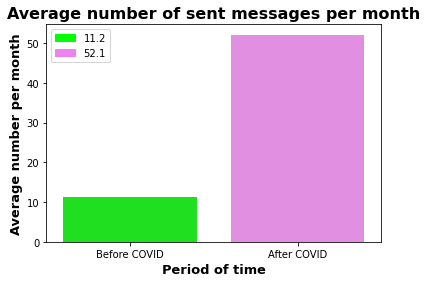

In [9]:
#Count average number of sent messages before COVID-19
df_2018 = df_all[(df_all["date"].str.contains("2018-")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2018 = df_2018["message_type"].count()

df_2019_01 = df_all[(df_all["date"].str.contains("2019-01")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2019_01 = df_2019_01["message_type"].count()
df_2019_02 = df_all[(df_all["date"].str.contains("2019-02")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2019_02 = df_2019_02["message_type"].count()
mess_2019_bf_COVID = mess_2019_01 + mess_2019_02

before_COVID_avg = round((mess_2018+mess_2019_bf_COVID)/14, 1)  #14 = 12 months in 2018 and 2 months in 2019

#Count average number of sent messages after COVID-19
df_2019 = df_all[(df_all["date"].str.contains("2019-")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2019_aft_COVID = df_2019["message_type"].count() - mess_2019_bf_COVID

df_2020 = df_all[(df_all["date"].str.contains("2020-")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2020 = df_2020["message_type"].count()

df_2021 = df_all[(df_all["date"].str.contains("2021-")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2021 = df_2021["message_type"].count()

df_2022 = df_all[(df_all["date"].str.contains("2022-")) & (df_all["from_id"] == "PeerUser(user_id=687038668)")]
mess_2022 = df_2022["message_type"].count()

after_COVID_avg = round((mess_2019_aft_COVID + mess_2020 + mess_2021 + mess_2022)/35, 1)    #35 = 10 months in 2019, 1 month in 2022(before downloading data) and for 12 months in 2020 and 2021

#diagram
colors = {before_COVID_avg:'lime', after_COVID_avg:'violet'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

x = ["Before COVID", "After COVID"]
y = [before_COVID_avg, after_COVID_avg]

sns.barplot(x, y, palette = ['lime','violet'])
plt.title('Average number of sent messages per month', fontsize=16, fontweight='bold')
plt.xlabel('Period of time', fontsize=13, fontweight='bold')
plt.ylabel('Average number per month', fontsize=13, fontweight='bold') 
plt.legend(handles, labels)
plt.show()

**18. My activness in Telegram before the COVID-19 and after (received messages per month).**

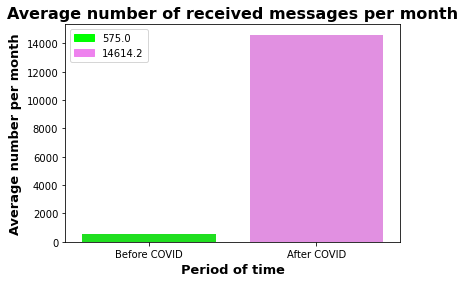

In [10]:
#Count average number of received messages before COVID-19
df_2018 = df_all[df_all["date"].str.contains("2018-")]
rec_mess_2018 = df_2018["message_type"].count() - mess_2018

df_2019_01 = df_all[df_all["date"].str.contains("2019-01")]
rec_mess_2019_01 = df_2019_01["message_type"].count() - mess_2019_01
df_2019_02 = df_all[df_all["date"].str.contains("2019-02")]
rec_mess_2019_02 = df_2019_02["message_type"].count()
rec_mess_2019_bf_COVID = rec_mess_2019_01 + rec_mess_2019_02

rec_before_COVID_avg = round((rec_mess_2018+rec_mess_2019_bf_COVID)/14, 1)  #14 = 12 months in 2018 and 2 months in 2019

#Count average number of sent messages after COVID-19
df_2019 = df_all[df_all["date"].str.contains("2019-")]
rec_mess_2019_aft_COVID = df_2019["message_type"].count() - rec_mess_2019_bf_COVID - mess_2019_bf_COVID

df_2020 = df_all[df_all["date"].str.contains("2020-")]
rec_mess_2020 = df_2020["message_type"].count() - mess_2020

df_2021 = df_all[df_all["date"].str.contains("2021-")]
rec_mess_2021 = df_2021["message_type"].count() - mess_2021

df_2022 = df_all[df_all["date"].str.contains("2022-")]
rec_mess_2022 = df_2022["message_type"].count() - mess_2022

rec_after_COVID_avg = round((rec_mess_2019_aft_COVID + rec_mess_2020 + rec_mess_2021 + rec_mess_2022)/35, 1)   #35 = 10 months in 2019, 1 month in 2022(before downloading data) and for 12 months in 2020 and 2021

#diagram
colors = {rec_before_COVID_avg:'lime', rec_after_COVID_avg:'violet'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

x = ["Before COVID", "After COVID"]
y = [rec_before_COVID_avg, rec_after_COVID_avg]

sns.barplot(x, y, palette = ['lime','violet'])
plt.title('Average number of received messages per month', fontsize=16, fontweight='bold')
plt.xlabel('Period of time', fontsize=13, fontweight='bold')
plt.ylabel('Average number per month', fontsize=13, fontweight='bold') 
plt.legend(handles, labels)
plt.show()

**19. Groups and chats from which I most often forwarded messages.**

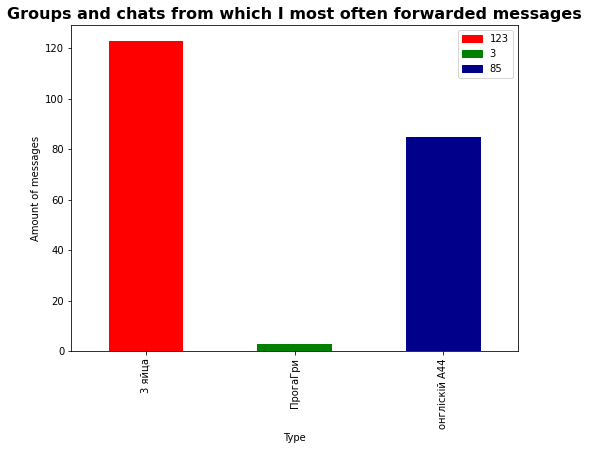

In [19]:
df_forwarded = df_combine.loc[(df_combine["from_id"] == "PeerUser(user_id=687038668)")].dropna(axis = 0,subset=['fwd_from'])

#for legend
df_3Eggs=df_forwarded[(df_forwarded["dialog_name"]=="3 яйца")]
three_eggs = df_3Eggs["message_type"].count()

df_progaGry=df_forwarded[(df_forwarded["dialog_name"]=="ПрогаГри")]
progaGry_sum = df_progaGry["message_type"].count()

df_ongliski=df_forwarded[(df_forwarded["dialog_name"]=="онгліскій A44")]
ongliski_sum = df_ongliski["message_type"].count()

colors = {three_eggs:'red', progaGry_sum:'green', ongliski_sum:'darkblue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]

#diagram
plt.figure(figsize=(8,6))
gr = df_forwarded.groupby(["dialog_name"])["dialog_name"].count().plot.bar(color = ['red','green','darkblue'])
plt.xlabel('Type')
plt.ylabel('Amount of messages')
plt.title('Groups and chats from which I most often forwarded messages', fontsize=16, fontweight='bold')
plt.legend(handles, labels)

**20. The groups I sent the most messages to.**

Text(0.5, 1.0, 'The groups I sent the most messages to.')

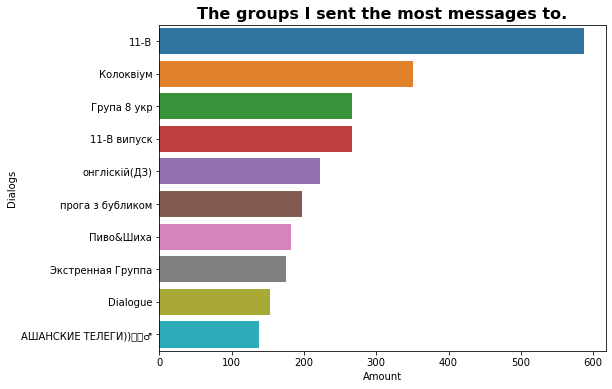

In [33]:
df_my_messages = df_combine[df_combine["from_id"] == "PeerUser(user_id=687038668)"].dropna(axis = 0,subset=['message'])
df_my_messages = df_my_messages.groupby(["dialog_name"])["dialog_name"].count().reset_index(name="amount")
df_my_messages = df_my_messages.sort_values(by='amount',ascending=False)
df_my_messages = df_my_messages.head(10)

#diagram
plt.figure(figsize=(8,6))
sns.barplot(data=df_my_messages, x="amount", y="dialog_name")
plt.xlabel('Amount')
plt.ylabel('Dialogs')
plt.title('The groups I sent the most messages to.', fontsize=16, fontweight='bold')